In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [76]:
n_samples = 1500 # no of data points 

# The dataset function is available in sklearn package.
noisy_moons,moon_labels = datasets.make_moons(n_samples = n_samples, noise = .1) # Generate Moon Toy Dataset.
noisy_circles,circle_labels = datasets.make_circles(n_samples = n_samples, factor = .5, noise = .05) # Generate Circle Toy Dataset.

# noisy_moons.shape
# moon_labels.shape

In [77]:
# Put in Array
noisy_moons = np.array(noisy_moons)
noisy_circles = np.array(noisy_circles)

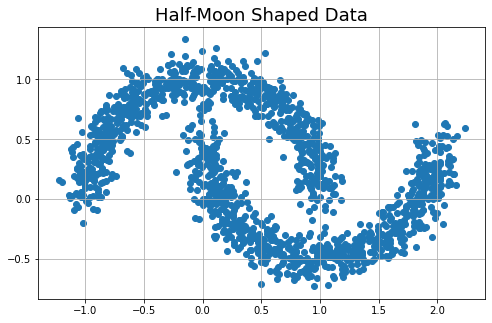

In [78]:
# Plot Half-Moon Data.
plt.figure(figsize = (8,5))
plt.title("Half-Moon Shaped Data", fontsize = 18)
plt.grid(True)
plt.scatter(noisy_moons[:,0], noisy_moons[:,1])
plt.savefig('HALF_MOON.png', dpi = 300)
plt.show()

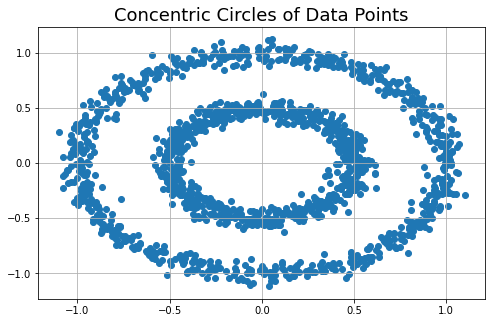

In [79]:
# Plot Circle Data.
plt.figure(figsize = (8,5))
plt.title("Concentric Circles of Data Points", fontsize = 18)
plt.grid(True)
plt.scatter(noisy_circles[:,0], noisy_circles[:,1])
plt.savefig('CIRCLE.png', dpi = 300)
plt.show()

# **K-Means Clustering**

[K-Means Clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means) aims to partition $N$ observations into $K$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. The problem is computationally difficult (NP-hard); however, efficient Heuristic Algorithms converge quickly to a local optimum K-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That’s why it can be useful to restart it several times.

[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

In [80]:
# Fit K-Means Clustering on noise moon data.
km = cluster.KMeans(n_clusters = 2)
km.fit(noisy_moons)
km.labels_

array([1, 0, 0, ..., 1, 1, 0], dtype=int32)

[sklearn.metrics.silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)

In [81]:
print("Completeness: %0.3f" % metrics.completeness_score(moon_labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(noisy_moons, km.labels_))

Completeness: 0.190
Silhouette Coefficient: 0.488


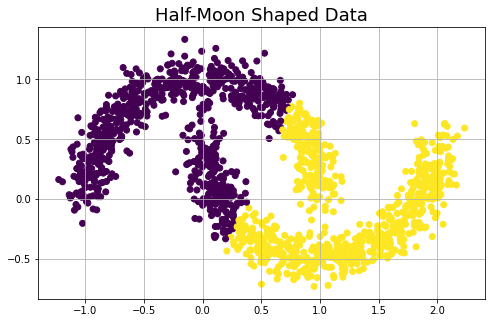

In [82]:
plt.figure(figsize = (8,5))
plt.title("Half-Moon Shaped Data", fontsize = 18)
plt.grid(True)
plt.scatter(noisy_moons[:,0], noisy_moons[:,1], c = km.labels_)
plt.savefig('CLUSTER_MOON.png', dpi = 300)
plt.show()

In [83]:
# Fit K-Means Clustering on noise circle data.
km.fit(noisy_circles)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
print("Completeness: %0.3f" % metrics.completeness_score(circle_labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(noisy_circles, km.labels_))

Completeness: 0.000
Silhouette Coefficient: 0.356


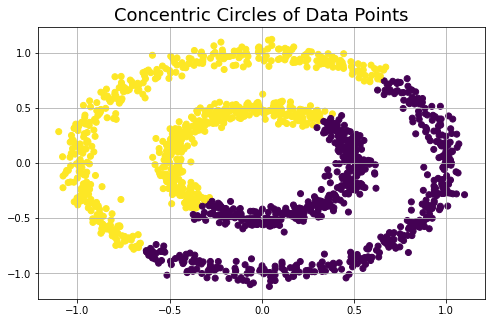

In [85]:
plt.figure(figsize = (8,5))
plt.title("Concentric Circles of Data Points", fontsize = 18)
plt.grid(True)
plt.scatter(noisy_circles[:,0], noisy_circles[:,1], c = km.labels_)
plt.savefig('CLUSTER_CIRCLE.png', dpi = 300)
plt.show()

###  Disadvanatges of K-Means Clustering

##### 1) Difficult to predict K-Value.
##### 2) With global cluster, it didn't work well.
##### 3) Different initial partitions can result in different final clusters.

# **DBSCAN**

[DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan) or **Density-Based Spatial Clustering of Applications with Noise** is a data clustering algorithm. It is a density-based clustering algorithm, i.e., given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

[sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

In [86]:
# Fit DBSCAN Clustering on noise moon data.
dbs = cluster.DBSCAN(eps = 0.1) # The maximum distance between two samples for them to be considered as in the same neighborhood.
dbs.fit(noisy_moons)
dbs.labels_

array([0, 0, 0, ..., 0, 0, 0])

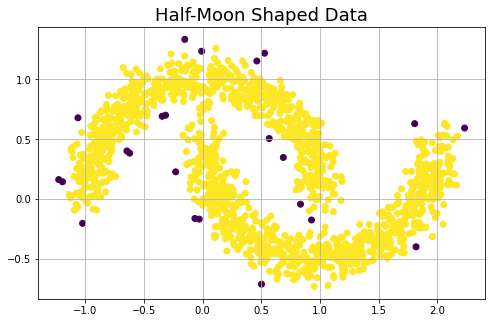

In [87]:
plt.figure(figsize = (8,5))
plt.title("Half-Moon Shaped Data", fontsize = 18)
plt.grid(True)
plt.scatter(noisy_moons[:,0], noisy_moons[:,1], c = dbs.labels_)
plt.savefig('DBSCAN_MOON.png', dpi = 300)
plt.show()

In [88]:
# Fit DBSCAN Clustering on noise circle data.
dbs.fit(noisy_circles)
dbs.labels_

array([0, 1, 1, ..., 1, 1, 1])

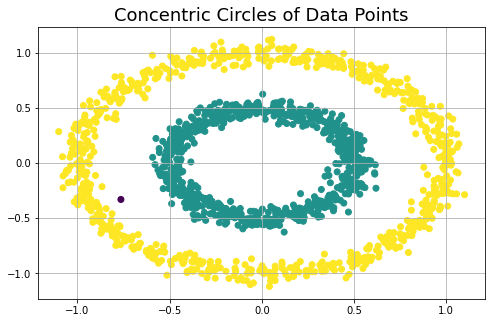

In [89]:
plt.figure(figsize = (8,5))
plt.title("Concentric Circles of Data Points", fontsize = 18)
plt.grid(True)
plt.scatter(noisy_circles[:,0], noisy_circles[:,1], c = dbs.labels_)
plt.savefig('DBSCAN_CIRCLE.png', dpi = 300)
plt.show()

# **PCA on Moon Data.**

In [90]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components = 2)
noisy_moons_spca = scikit_pca.fit_transform(noisy_moons)

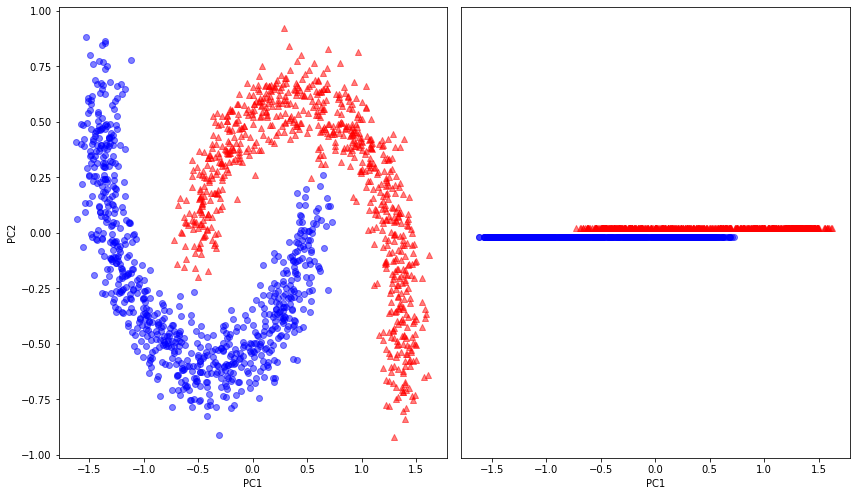

In [91]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 7))

ax[0].scatter(noisy_moons_spca[moon_labels == 0, 0], noisy_moons_spca[moon_labels == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(noisy_moons_spca[moon_labels == 1, 0], noisy_moons_spca[moon_labels == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(noisy_moons_spca[moon_labels == 0, 0], np.zeros((750, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(noisy_moons_spca[moon_labels == 1, 0], np.zeros((750, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.savefig('PCA_MOON.png', dpi = 300)
plt.show()

          0         1
0  1.000000 -0.440838
1 -0.440838  1.000000


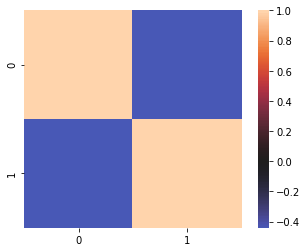

In [92]:
# Compute the correlation matrix before doing PCA.
nm = pd.DataFrame(noisy_moons)
pca_corr = nm.corr()
print(pca_corr)
sns.heatmap(pca_corr, vmax = 1, center = 0, square = True)
plt.savefig('CORR_PCA.png', dpi = 300)

              0             1
0  1.000000e+00  1.887106e-16
1  1.887106e-16  1.000000e+00


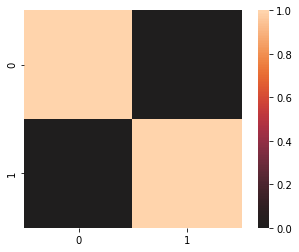

In [93]:
# Compute the correlation matrix after doing PCA.
nmp = pd.DataFrame(noisy_moons_spca)
corr_pca = nmp.corr()
print(corr_pca)
sns.heatmap(corr_pca, vmax = 1, center = 0, square = True)
plt.savefig('PCA_CORR.png', dpi = 300)

In [94]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 15)
noisy_moons_kpca = scikit_kpca.fit_transform(noisy_moons)

              0             1
0  1.000000e+00 -5.488335e-17
1 -5.488335e-17  1.000000e+00


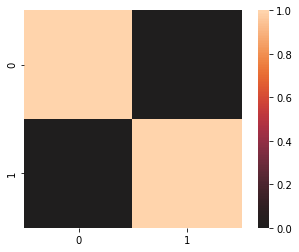

In [95]:
# Compute the correlation matrix after doing PCA.

kmp = pd.DataFrame(noisy_moons_kpca)
corr_kpca = kmp.corr()
print(corr_kpca)
sns.heatmap(corr_kpca, vmax = 1, center = 0, square = True)
plt.savefig('KPCA_CORR.png', dpi = 300)

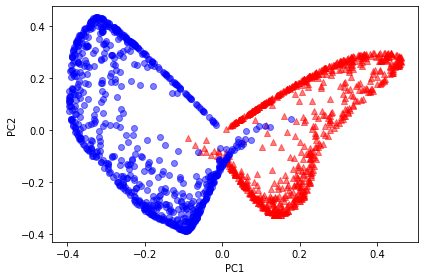

In [96]:
plt.scatter(noisy_moons_kpca[moon_labels == 0, 0], noisy_moons_kpca[moon_labels == 0, 1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(noisy_moons_kpca[moon_labels == 1, 0], noisy_moons_kpca[moon_labels == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.savefig('KPCA_MOON.png', dpi = 300)

# **Outlier Detection**

In [97]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, contamination = 0.01)
clf.fit(noisy_moons)
y_pred_train = clf.predict(noisy_moons)

pos = y_pred_train > 0
neg = y_pred_train < 0

1485
15


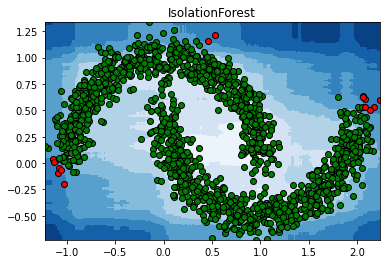

In [98]:
# Plot the line, the samples, and the nearest vectors to the plane.
xx, yy = np.meshgrid(np.linspace(min((noisy_moons[:, 0])), max((noisy_moons[:, 0])), 500), np.linspace(min((noisy_moons[:, 1])), max((noisy_moons[:, 1])), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap = plt.cm.Blues_r)

b1 = plt.scatter(noisy_moons[pos][:, 0], noisy_moons[pos][:, 1], c = 'green', edgecolor = 'k')
b2 = plt.scatter(noisy_moons[neg][:, 0], noisy_moons[neg][:, 1], c = 'red', edgecolor = 'k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.savefig('OUTLIER_MOON.png', dpi = 300)
print(pos.sum())
print(neg.sum())

In [99]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, contamination = 0.01)
clf.fit(noisy_circles)
y_pred_train = clf.predict(noisy_circles)

pos = y_pred_train > 0
neg = y_pred_train < 0

1485
15


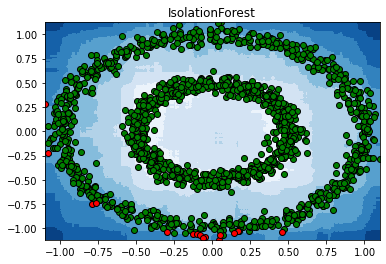

In [100]:
# Plot the line, the samples, and the nearest vectors to the plane.
xx, yy = np.meshgrid(np.linspace(min((noisy_circles[:, 0])), max((noisy_circles[:, 0])), 500), np.linspace(min((noisy_circles[:, 1])), max((noisy_circles[:, 1])), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap = plt.cm.Blues_r)

b1 = plt.scatter(noisy_circles[pos][:, 0], noisy_circles[pos][:, 1], c = 'green', edgecolor = 'k')
b2 = plt.scatter(noisy_circles[neg][:, 0], noisy_circles[neg][:, 1], c = 'red', edgecolor = 'k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.savefig('OUTLIER_CIRCLE.png', dpi = 300)
print(pos.sum())
print(neg.sum())

# **Clustering and PCA on Wine Dataset.**

In [101]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/wine/wine.data', header = None)

df_wine.columns = ['Class Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alkalinity of Ash', 'Magnesium', 'Total Phenols', 'Flavanoids', 
                   'Nonflavanoid Phenols', 'Proanthocyanidins', 'Color Intensity', 'Hue', 'OD280/OD315 of Diluted Wines', 'Proline']

df_wine.head()

,Class Label,Alcohol,Malic Acid,Ash,Alkalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanidins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [102]:
# Split data into x (Input) and y (Output/Label) variables.
x = df_wine.iloc[:,1:14]
y = df_wine.iloc[:,:1]
print(x.columns)
print(y.columns)

Index(['Alcohol', 'Malic Acid', 'Ash', 'Alkalinity of Ash', 'Magnesium',
       'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
       'Proanthocyanidins', 'Color Intensity', 'Hue',
       'OD280/OD315 of Diluted Wines', 'Proline'],
      dtype='object')
Index(['Class Label'], dtype='object')


In [103]:
# Task 1: Check the counts of each wine class.

y.groupby('Class Label').size()

Class Label
1    59
2    71
3    48
dtype: int64

In [104]:
# Task 2: Cluster wine data using K-Means Algorithm.
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 3, random_state = 3)
cluster.fit(x)
print(cluster.labels_)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


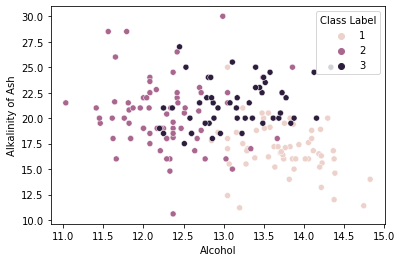

In [105]:
# Task 3: Scatter plot wine data into 3 classes based on True Labels and plot with legends. Hint: use any two variables.

sns.scatterplot(x = x.iloc[:,0], y = x.iloc[:,3], hue = y['Class Label'], legend = "full")

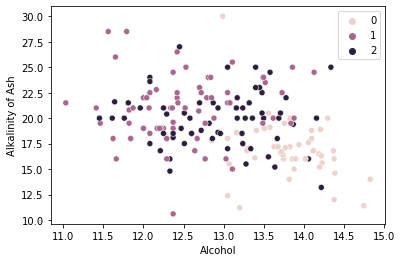

In [106]:
# Task 4: Use cluster model labels to group data based on predicted classes.

sns.scatterplot(x = x.iloc[:,0], y = x.iloc[:,3], hue = cluster.labels_, legend = "full")

In [107]:
# Split dataset into 70:30 training and test subsets, respectively.

from sklearn.model_selection import train_test_split

X, Y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 0)

In [108]:
print(pd.value_counts(pd.Series(Y)))
print(pd.value_counts(pd.Series(Y_train)))
print(pd.value_counts(pd.Series(Y_test)))

2    71
1    59
3    48
dtype: int64
2    50
1    41
3    33
dtype: int64
2    21
1    18
3    15
dtype: int64


In [109]:
# Standardizing the data.
# Standardize features by removing the mean and scaling to unit variance.
# The standard score of a sample x is calculated as: z = (x - u) / s

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# **Dimensionality Reduction: Principal Component Analysis using Scikit-learn.**

[Principal Component Analysis](https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca)

[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

In [110]:
from sklearn.decomposition import PCA

In [111]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

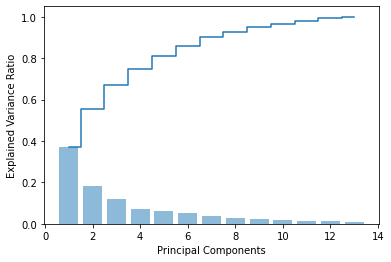

In [112]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha = 0.5, align = 'center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.savefig('PCA_WINE.png', dpi = 300)
plt.show()

In [113]:
# Task 5: Apply PCA with n_components = 2 on X_train_std wine data and transform test data accordingly.

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

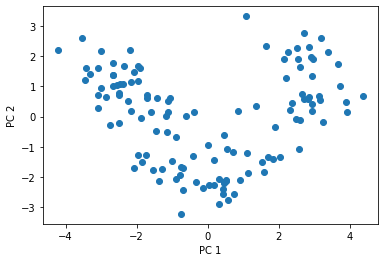

In [114]:
# Plot the first two principal components.

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('PCA_WINE_ULBL.png', dpi = 300)
plt.show()

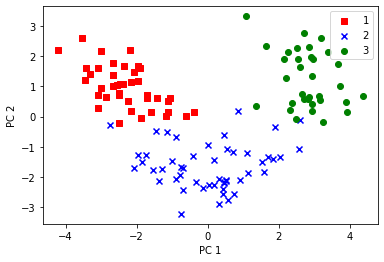

In [115]:
# Plot of two best principal components using y_train data.
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(Y_train), colors, markers):
    plt.scatter(X_train_pca[Y_train == l, 0], X_train_pca[Y_train == l, 1], c = c, label = l, marker = m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.savefig('PCA_WINE_LBL.png', dpi = 300)

In [116]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):

    # Setup marker generator and color map.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples.
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.6, c = cmap(idx), edgecolor = 'black', label = cl)

# Training Logistic Regression Classifier using the first 2 Principal Components.

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Task 6: Apply Logistic Regression on training features and predict test features.

lr = LogisticRegression(random_state = 0)
lr = lr.fit(X_train_pca, Y_train)
pred_lab = lr.predict(X_test_pca)
print("Accuracy on test is = %f" % (100 * accuracy_score(Y_test, pred_lab)))

Accuracy on test is = 92.592593


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


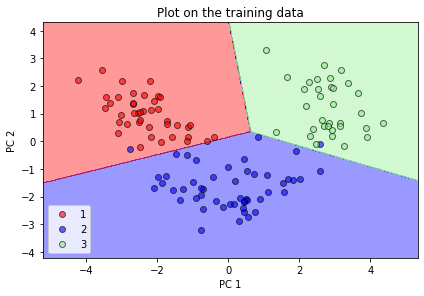

In [118]:
# Plot the decision region on training features and test labels using classifier you have trained above.

plot_decision_regions(X_train_pca, Y_train, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.title('Plot on the training data')
plt.savefig('TRAIN_CLASS.png', dpi = 300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


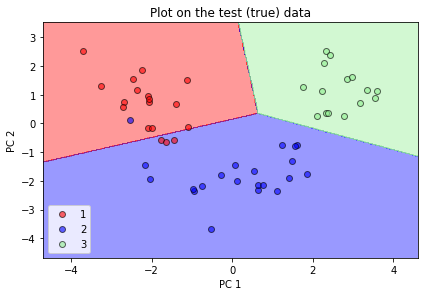

In [119]:
#  Plot the decision region on test features and true labels using classifier you have trained above.
plot_decision_regions(X_test_pca, Y_test, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.title('Plot on the test (true) data')
plt.savefig('TEST_CLASS_TRUE.png', dpi = 300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


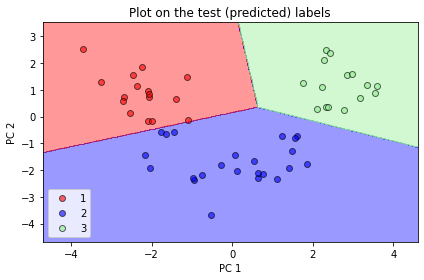

In [120]:
#  Plot the decision region on test features and predicted labels using classifier you have trained above.
plot_decision_regions(X_test_pca, pred_lab, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.title('Plot on the test (predicted) labels')
plt.tight_layout()
plt.savefig('TEST_CLASS.png', dpi = 300)
plt.show()